In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np
import missingno as msno

import datetime as dt
from datetime import date, time, datetime

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

sn.set(rc={'figure.figsize':[15,15]},font_scale=1.3)

In [3]:
df_customer = pd.read_csv("olist_customers_dataset.csv")
df_customer.head()

customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP

In [4]:
df_customer.customer_id.nunique()

99441

In [5]:
df_customer.customer_unique_id.nunique()

96096

In [6]:
df_customer.shape

(99441, 5)

In [7]:
df_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [8]:
df_geolocation = pd.read_csv("olist_geolocation_dataset.csv")
df_geolocation.head()

geolocation_zip_code_prefix  geolocation_lat  geolocation_lng  \
0                         1037       -23.545621       -46.639292   
1                         1046       -23.546081       -46.644820   
2                         1046       -23.546129       -46.642951   
3                         1041       -23.544392       -46.639499   
4                         1035       -23.541578       -46.641607   

  geolocation_city geolocation_state  
0        sao paulo                SP  
1        sao paulo                SP  
2        sao paulo                SP  
3        sao paulo                SP  
4        sao paulo                SP

In [9]:
df_geolocation.shape

(1000163, 5)

In [10]:
df_geolocation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [11]:
df_order_item = pd.read_csv("olist_order_items_dataset.csv")
df_order_item.head()

order_id  order_item_id  \
0  00010242fe8c5a6d1ba2dd792cb16214              1   
1  00018f77f2f0320c557190d7a144bdd3              1   
2  000229ec398224ef6ca0657da4fc703e              1   
3  00024acbcdf0a6daa1e931b038114c75              1   
4  00042b26cf59d7ce69dfabb4e55b4fd9              1   

                         product_id                         seller_id  \
0  4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1  e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2  c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3  7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4  ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   

   shipping_limit_date   price  freight_value  
0  2017-09-19 09:45:35   58.90          13.29  
1  2017-05-03 11:05:13  239.90          19.93  
2  2018-01-18 14:48:30  199.00          17.87  
3  2018-08-15 10:10:18   12.99          12.79  
4  2017-02-13 13:57:51  199.90          18.14

In [12]:
df_order_item.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [13]:
df_order_item.shape

(112650, 7)

In [14]:
df_order_item.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [15]:
df_order_item.nunique()

order_id               98666
order_item_id             21
product_id             32951
seller_id               3095
shipping_limit_date    93318
price                   5968
freight_value           6999
dtype: int64

In [16]:
df_order_payment = pd.read_csv("olist_order_payments_dataset.csv")
df_order_payment.head()

order_id  payment_sequential payment_type  \
0  b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1  a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2  25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3  ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4  42fdf880ba16b47b59251dd489d4441a                   1  credit_card   

   payment_installments  payment_value  
0                     8          99.33  
1                     1          24.39  
2                     1          65.71  
3                     8         107.78  
4                     2         128.45

In [17]:
df_order_payment.shape

(103886, 5)

In [18]:
df_order_payment.order_id.nunique()

99440

In [19]:
df_order_payment.shape

(103886, 5)

In [20]:
df_order_payment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [21]:
df_order_review = pd.read_csv("olist_order_reviews_dataset.csv")
df_order_review.head()

review_id                          order_id  \
0  7bc2406110b926393aa56f80a40eba40  73fc7af87114b39712e6da79b0a377eb   
1  80e641a11e56f04c1ad469d5645fdfde  a548910a1c6147796b98fdf73dbeba33   
2  228ce5500dc1d8e020d8d1322874b6f0  f9e4b658b201a9f2ecdecbb34bed034b   
3  e64fb393e7b32834bb789ff8bb30750e  658677c97b385a9be170737859d3511b   
4  f7c4243c7fe1938f181bec41a392bdeb  8e6bfb81e283fa7e4f11123a3fb894f1   

   review_score review_comment_title  \
0             4                  NaN   
1             5                  NaN   
2             5                  NaN   
3             5                  NaN   
4             5                  NaN   

                              review_comment_message review_creation_date  \
0                                                NaN  2018-01-18 00:00:00   
1                                                NaN  2018-03-10 00:00:00   
2                                                NaN  2018-02-17 00:00:00   
3              Recebi bem antes do prazo estipulado.  2017-04-21 00:00:00   
4  Parabéns lojas lannister adorei comprar pela I...  2018-03-01 00:00:00   

  review_answer_timestamp  
0     2018-01-18 21:46:59  
1     2018-03-11 03:05:13  
2     2018-02-18 14:36:24  
3     2017-04-21 22:02:06  
4     2018-03-02 10:26:53

In [22]:
df_order_review.nunique()

review_id                  98410
order_id                   98673
review_score                   5
review_comment_title        4527
review_comment_message     36159
review_creation_date         636
review_answer_timestamp    98248
dtype: int64

In [23]:
df_order_review.shape

(99224, 7)

In [24]:
df_order_review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
df_order_review['review_comment_message'].fillna("no comme", inplace=True)
df_order_review =df_order_review.drop(['review_comment_title'],axis=1)
df_order_review = df_order_review.dropna()

In [26]:
df_order = pd.read_csv("olist_orders_dataset.csv")
df_order.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3  949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4  ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   

  order_status order_purchase_timestamp    order_approved_at  \
0    delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1    delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2    delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3    delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4    delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2018-07-26 14:31:00           2018-08-07 15:27:45   
2          2018-08-08 13:50:00           2018-08-17 18:06:29   
3          2017-11-22 13:39:59           2017-12-02 00:28:42   
4          2018-02-14 19:46:34           2018-02-16 18:17:02   

  order_estimated_delivery_date  
0           2017-10-18 00:00:00  
1           2018-08-13 00:00:00  
2           2018-09-04 00:00:00  
3           2017-12-15 00:00:00  
4           2018-02-26 00:00:00

In [27]:
df_order.shape

(99441, 8)

In [28]:
df_order.nunique()

order_id                         99441
customer_id                      99441
order_status                         8
order_purchase_timestamp         98875
order_approved_at                90733
order_delivered_carrier_date     81018
order_delivered_customer_date    95664
order_estimated_delivery_date      459
dtype: int64

In [29]:
df_order.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [30]:
order_status = df_order['order_status'].value_counts().to_frame()
order_status.style.background_gradient(cmap='Greens')

In [31]:
# Transformer les variables représentant des dates/heures en Datetime
cols = ['order_purchase_timestamp', 'order_approved_at',
        'order_delivered_carrier_date', 'order_delivered_customer_date',
        'order_estimated_delivery_date']
for col in cols:
    df_order[col] = pd.to_datetime(df_order[col],
                                    format='%Y-%m-%d %H:%M:%S')

In [32]:
df_order["order_purchase_date"] = \
    df_order["order_purchase_timestamp"].dt.date
Order_day = df_order.groupby('order_purchase_date')['customer_id'].nunique()
Period = df_order['order_purchase_date'].unique()
Period.sort()

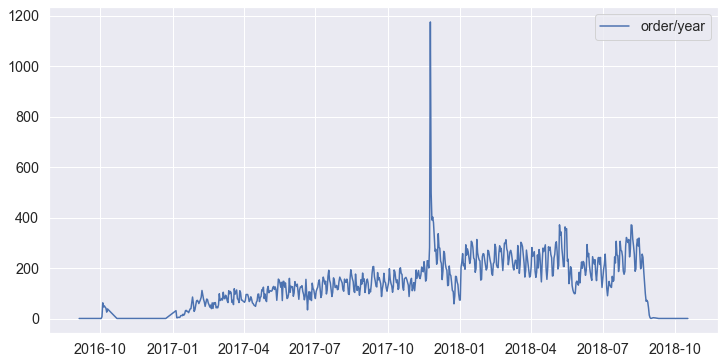

In [33]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(Period, Order_day, label="order/year")
ax.legend()
plt.show()

In [34]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97658 non-null  datetime64[ns]
 6   order_delivered_customer_date  96476 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99441 non-null  datetime64[ns]
 8   order_purchase_date            99441 non-null  object        
dtypes: datetime64[ns](5), object(4)
memory usage: 6.8+ MB


In [35]:
purchase_date = (df_order["order_purchase_date"] > date(2016, 12, 31)) & \
                 (df_order["order_purchase_date"] < date(2018, 9, 1))
df_order = df_order[purchase_date]

In [36]:
df_order.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99092 entries, 0 to 99440
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99092 non-null  object        
 1   customer_id                    99092 non-null  object        
 2   order_status                   99092 non-null  object        
 3   order_purchase_timestamp       99092 non-null  datetime64[ns]
 4   order_approved_at              98957 non-null  datetime64[ns]
 5   order_delivered_carrier_date   97376 non-null  datetime64[ns]
 6   order_delivered_customer_date  96204 non-null  datetime64[ns]
 7   order_estimated_delivery_date  99092 non-null  datetime64[ns]
 8   order_purchase_date            99092 non-null  object        
dtypes: datetime64[ns](5), object(4)
memory usage: 7.6+ MB


In [37]:
df_product = pd.read_csv("olist_products_dataset.csv")
df_product.head()

product_id  product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumaria   
1  3aa071139cb16b67ca9e5dea641aaa2f                  artes   
2  96bd76ec8810374ed1b65e291975717f          esporte_lazer   
3  cef67bcfe19066a932b7673e239eb23d                  bebes   
4  9dc1a7de274444849c219cff195d0b71  utilidades_domesticas   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [38]:
df_product.shape

(32951, 9)

In [39]:
df_product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [40]:
df_seller = pd.read_csv("olist_sellers_dataset.csv")
df_seller.head()

seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023   
1  d1b65fc7debc3361ea86b5f14c68d2e2                   13844   
2  ce3ad9de960102d0677a81f5d0bb7b2d                   20031   
3  c0f3eea2e14555b6faeea3dd58c1b1c3                    4195   
4  51a04a8a6bdcb23deccc82b0b80742cf                   12914   

         seller_city seller_state  
0           campinas           SP  
1         mogi guacu           SP  
2     rio de janeiro           RJ  
3          sao paulo           SP  
4  braganca paulista           SP

In [41]:
df_seller.nunique()

seller_id                 3095
seller_zip_code_prefix    2246
seller_city                611
seller_state                23
dtype: int64

In [42]:
df_seller.shape

(3095, 4)

In [43]:
df_seller.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [44]:
df_product_category_translation = pd.read_csv("product_category_name_translation.csv")
df_product_category_translation.head()

product_category_name product_category_name_english
0            beleza_saude                 health_beauty
1  informatica_acessorios         computers_accessories
2              automotivo                          auto
3         cama_mesa_banho                bed_bath_table
4        moveis_decoracao               furniture_decor

In [45]:
df_product_category_translation.shape

(71, 2)

In [46]:
df_product_category_translation.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [47]:
df_product = (df_product.merge(df_product_category_translation, how = 'left' , on = 'product_category_name'))
df_product = df_product.drop('product_category_name', axis=1)
df_product.rename(columns = {'product_category_name_english': 'product_category_name'}, inplace = True)
df_product = df_product[['product_id','product_category_name','product_name_lenght','product_description_lenght','product_photos_qty','product_weight_g','product_length_cm','product_height_cm','product_width_cm']]


In [48]:
df_product.head()

product_id product_category_name  \
0  1e9e8ef04dbcff4541ed26657ea517e5             perfumery   
1  3aa071139cb16b67ca9e5dea641aaa2f                   art   
2  96bd76ec8810374ed1b65e291975717f        sports_leisure   
3  cef67bcfe19066a932b7673e239eb23d                  baby   
4  9dc1a7de274444849c219cff195d0b71            housewares   

   product_name_lenght  product_description_lenght  product_photos_qty  \
0                 40.0                       287.0                 1.0   
1                 44.0                       276.0                 1.0   
2                 46.0                       250.0                 1.0   
3                 27.0                       261.0                 1.0   
4                 37.0                       402.0                 4.0   

   product_weight_g  product_length_cm  product_height_cm  product_width_cm  
0             225.0               16.0               10.0              14.0  
1            1000.0               30.0               18.0              20.0  
2             154.0               18.0                9.0              15.0  
3             371.0               26.0                4.0              26.0  
4             625.0               20.0               17.0              13.0

In [49]:
df_main = (
            # The main df is based on the order dataframe
            df_order
    
                # Merge order payment dataframe
                .merge(df_order_payment, how='left', on='order_id')
           
                # Merge order item dataframe
                .merge(df_order_item, how='left', on='order_id')
    
                #Merge order review dataframe
                .merge(df_order_review,how='left',on = 'order_id')
                
                #Merge product dataframe
                .merge(df_product,how='left',on = 'product_id')
    
                #Merge customer dataframe
                .merge(df_customer,how = 'left',on = 'customer_id')
    
                #Merge seller dataframe
                .merge(df_seller, how = 'left', on = 'seller_id')

)

In [50]:
df_main.head()

order_id                       customer_id  \
0  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
2  e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
3  53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
4  47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   

  order_status order_purchase_timestamp   order_approved_at  \
0    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
1    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
2    delivered      2017-10-02 10:56:33 2017-10-02 11:07:15   
3    delivered      2018-07-24 20:41:37 2018-07-26 03:24:27   
4    delivered      2018-08-08 08:38:49 2018-08-08 08:55:23   

  order_delivered_carrier_date order_delivered_customer_date  \
0          2017-10-04 19:55:00           2017-10-10 21:25:13   
1          2017-10-04 19:55:00           2017-10-10 21:25:13   
2          2017-10-04 19:55:00           2017-10-10 21:25:13   
3          2018-07-26 14:31:00           2018-08-07 15:27:45   
4          2018-08-08 13:50:00           2018-08-17 18:06:29   

  order_estimated_delivery_date order_purchase_date  payment_sequential  \
0                    2017-10-18          2017-10-02                   1   
1                    2017-10-18          2017-10-02                   3   
2                    2017-10-18          2017-10-02                   2   
3                    2018-08-13          2018-07-24                   1   
4                    2018-09-04          2018-08-08                   1   

  payment_type  payment_installments  payment_value  order_item_id  \
0  credit_card                     1          18.12            1.0   
1      voucher                     1           2.00            1.0   
2      voucher                     1          18.59            1.0   
3       boleto                     1         141.46            1.0   
4  credit_card                     3         179.12            1.0   

                         product_id                         seller_id  \
0  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
1  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
2  87285b34884572647811a353c7ac498a  3504c0cb71d7fa48d967e0e4c94d59d9   
3  595fac2a385ac33a80bd5114aec74eb8  289cdb325fb7e7f891c38608bf9e0962   
4  aa4383b373c6aca5d8797843e5594415  4869f7a5dfa277a7dca6462dcf3b52b2   

   shipping_limit_date   price  freight_value  \
0  2017-10-06 11:07:15   29.99           8.72   
1  2017-10-06 11:07:15   29.99           8.72   
2  2017-10-06 11:07:15   29.99           8.72   
3  2018-07-30 03:24:27  118.70          22.76   
4  2018-08-13 08:55:23  159.90          19.22   

                          review_id  review_score  \
0  a54f0611adc9ed256b57ede6b6eb5114           4.0   
1  a54f0611adc9ed256b57ede6b6eb5114           4.0   
2  a54f0611adc9ed256b57ede6b6eb5114           4.0   
3  8d5266042046a06655c8db133d120ba5           4.0   
4  e73b67b67587f7644d5bd1a52deb1b01           5.0   

                              review_comment_message review_creation_date  \
0  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
1  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
2  Não testei o produto ainda, mas ele veio corre...  2017-10-11 00:00:00   
3                               Muito bom o produto.  2018-08-08 00:00:00   
4                                           no comme  2018-08-18 00:00:00   

  review_answer_timestamp product_category_name  product_name_lenght  \
0     2017-10-12 03:43:48            housewares                 40.0   
1     2017-10-12 03:43:48            housewares                 40.0   
2     2017-10-12 03:43:48            housewares                 40.0   
3     2018-08-08 18:37:50             perfumery                 29.0   
4     2018-08-22 19:07:58                  auto                 46.0   

   

In [51]:
df_main = df_main[df_main['payment_type'] != 'not_defined']

In [52]:
PaymentType = df_main['payment_type'].value_counts().head(57).to_frame()
PaymentType.style.background_gradient(cmap='Reds')

In [53]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 118712 entries, 0 to 118713
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       118712 non-null  object        
 1   customer_id                    118712 non-null  object        
 2   order_status                   118712 non-null  object        
 3   order_purchase_timestamp       118712 non-null  datetime64[ns]
 4   order_approved_at              118562 non-null  datetime64[ns]
 5   order_delivered_carrier_date   116700 non-null  datetime64[ns]
 6   order_delivered_customer_date  115378 non-null  datetime64[ns]
 7   order_estimated_delivery_date  118712 non-null  datetime64[ns]
 8   order_purchase_date            118712 non-null  object        
 9   payment_sequential             118712 non-null  int64         
 10  payment_type                   118712 non-null  object        
 11  

In [54]:
df_main.shape

(118712, 39)

In [55]:
df_main.shape

(118712, 39)

In [56]:
df_main.columns.to_list()

['order_id',
 'customer_id',
 'order_status',
 'order_purchase_timestamp',
 'order_approved_at',
 'order_delivered_carrier_date',
 'order_delivered_customer_date',
 'order_estimated_delivery_date',
 'order_purchase_date',
 'payment_sequential',
 'payment_type',
 'payment_installments',
 'payment_value',
 'order_item_id',
 'product_id',
 'seller_id',
 'shipping_limit_date',
 'price',
 'freight_value',
 'review_id',
 'review_score',
 'review_comment_message',
 'review_creation_date',
 'review_answer_timestamp',
 'product_category_name',
 'product_name_lenght',
 'product_description_lenght',
 'product_photos_qty',
 'product_weight_g',
 'product_length_cm',
 'product_height_cm',
 'product_width_cm',
 'customer_unique_id',
 'customer_zip_code_prefix',
 'customer_city',
 'customer_state',
 'seller_zip_code_prefix',
 'seller_city',
 'seller_state']

In [57]:
df_main.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 150
order_delivered_carrier_date     2012
order_delivered_customer_date    3334
order_estimated_delivery_date       0
order_purchase_date                 0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                     795
product_id                        795
seller_id                         795
shipping_limit_date               795
price                             795
freight_value                     795
review_id                         990
review_score                      990
review_comment_message            990
review_creation_date              990
review_answer_timestamp           990
product_category_name            2527
product_name_lenght              2502
product_desc

Text(0.5, 1.0, 'Taux de complétion des données')

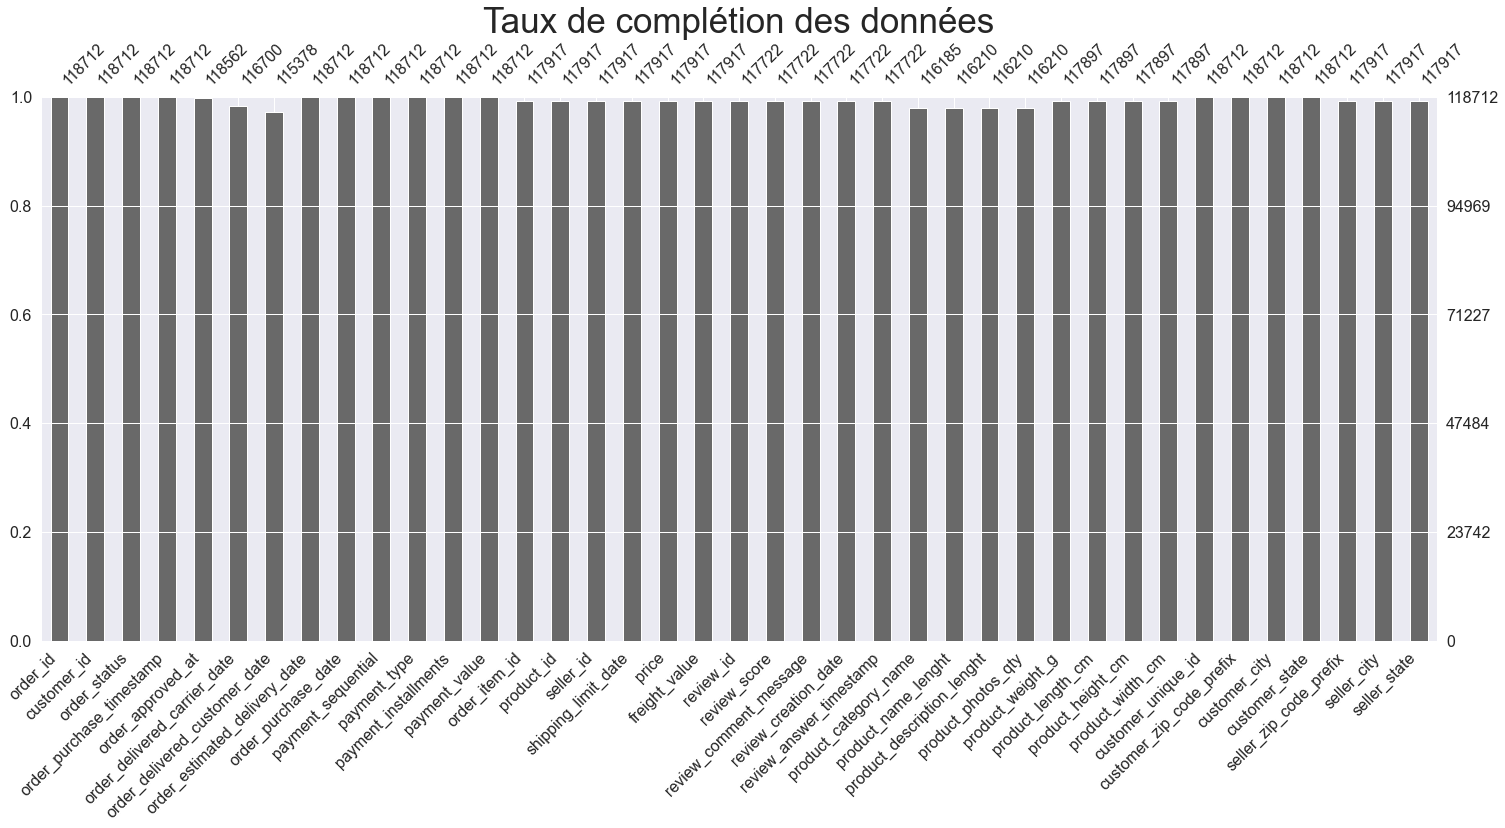

In [58]:
msno.bar(df_main)
plt.title('Taux de complétion des données',fontsize = 35)
#plt.savefig("Taux de complétion des données.jpg")

In [59]:
#regarder le taux remplissage de chaque variable 
df_main.isna().mean().round(1)* 100

order_id                         0.0
customer_id                      0.0
order_status                     0.0
order_purchase_timestamp         0.0
order_approved_at                0.0
order_delivered_carrier_date     0.0
order_delivered_customer_date    0.0
order_estimated_delivery_date    0.0
order_purchase_date              0.0
payment_sequential               0.0
payment_type                     0.0
payment_installments             0.0
payment_value                    0.0
order_item_id                    0.0
product_id                       0.0
seller_id                        0.0
shipping_limit_date              0.0
price                            0.0
freight_value                    0.0
review_id                        0.0
review_score                     0.0
review_comment_message           0.0
review_creation_date             0.0
review_answer_timestamp          0.0
product_category_name            0.0
product_name_lenght              0.0
product_description_lenght       0.0
p

In [60]:
#df_main = df_main.drop(['review_comment_title','review_comment_message'], axis=1)

In [61]:
df_main.isna().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 150
order_delivered_carrier_date     2012
order_delivered_customer_date    3334
order_estimated_delivery_date       0
order_purchase_date                 0
payment_sequential                  0
payment_type                        0
payment_installments                0
payment_value                       0
order_item_id                     795
product_id                        795
seller_id                         795
shipping_limit_date               795
price                             795
freight_value                     795
review_id                         990
review_score                      990
review_comment_message            990
review_creation_date              990
review_answer_timestamp           990
product_category_name            2527
product_name_lenght              2502
product_desc

In [62]:
df_main.shape

(118712, 39)

In [63]:
df_main.dropna(inplace= True, how='any')

In [64]:
df_main.isna().sum()

order_id                         0
customer_id                      0
order_status                     0
order_purchase_timestamp         0
order_approved_at                0
order_delivered_carrier_date     0
order_delivered_customer_date    0
order_estimated_delivery_date    0
order_purchase_date              0
payment_sequential               0
payment_type                     0
payment_installments             0
payment_value                    0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
review_id                        0
review_score                     0
review_comment_message           0
review_creation_date             0
review_answer_timestamp          0
product_category_name            0
product_name_lenght              0
product_description_lenght       0
product_photos_qty               0
product_weight_g    

In [65]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 112858 entries, 0 to 118713
Data columns (total 39 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   order_id                       112858 non-null  object        
 1   customer_id                    112858 non-null  object        
 2   order_status                   112858 non-null  object        
 3   order_purchase_timestamp       112858 non-null  datetime64[ns]
 4   order_approved_at              112858 non-null  datetime64[ns]
 5   order_delivered_carrier_date   112858 non-null  datetime64[ns]
 6   order_delivered_customer_date  112858 non-null  datetime64[ns]
 7   order_estimated_delivery_date  112858 non-null  datetime64[ns]
 8   order_purchase_date            112858 non-null  object        
 9   payment_sequential             112858 non-null  int64         
 10  payment_type                   112858 non-null  object        
 11  

In [66]:
df_main.shape

(112858, 39)

In [67]:
df_main.describe().T

count          mean           std      min  \
payment_sequential          112858.0      1.090787      0.687018     1.00   
payment_installments        112858.0      2.940997      2.777261     0.00   
payment_value               112858.0    171.521231    264.377716     0.00   
order_item_id               112858.0      1.194873      0.687310     1.00   
price                       112858.0    119.833163    181.133560     0.85   
freight_value               112858.0     20.004804     15.719480     0.00   
review_score                112858.0      4.083087      1.345371     1.00   
product_name_lenght         112858.0     48.800590     10.011718     5.00   
product_description_lenght  112858.0    784.587774    650.272582     4.00   
product_photos_qty          112858.0      2.206055      1.717585     1.00   
product_weight_g            112858.0   2106.142985   3765.576494     0.00   
product_length_cm           112858.0     30.275390     16.144259     7.00   
product_height_cm           112858.0     16.591549     13.438675     2.00   
product_width_cm            112858.0     23.098699     11.738739     6.00   
customer_zip_code_prefix    112858.0  35072.308255  29864.154182  1003.00   
seller_zip_code_prefix      112858.0  24509.451328  27642.526882  1001.00   

                                 25%       50%       75%       max  
payment_sequential              1.00      1.00      1.00     26.00  
payment_installments            1.00      2.00      4.00     24.00  
payment_value                  60.85    107.94    189.08  13664.08  
order_item_id                   1.00      1.00      1.00     21.00  
price                          39.90     74.90    132.97   6735.00  
freight_value                  13.08     16.32     21.19    409.68  
review_score                    4.00      5.00      5.00      5.00  
product_name_lenght            42.00     52.00     57.00     76.00  
product_description_lenght    346.00    600.00    982.00   3992.00  
product_photos_qty              1.00      1.00      3.00     20.00  
product_weight_g              300.00    700.00   1800.00  40425.00  
product_length_cm              18.00     25.00     38.00    105.00  
product_height_cm               8.00     13.00     20.00    105.00  
product_width_cm               15.00     20.00     30.00    118.00  
customer_zip_code_prefix    11250.00  24310.00  58777.50  99980.00  
seller_zip_code_prefix       6429.00  13660.00  28470.00  99730.00

### FEATURE ENGINEERING  

#### création variable 'panier moyenne'

In [68]:
average_purchase = df_main[['customer_unique_id','price']].groupby(['customer_unique_id']).mean()
average_purchase = average_purchase.rename(columns = {'price': 'average_purchase'})
average_purchase = average_purchase.reset_index()

In [69]:
average_purchase.head()

customer_unique_id  average_purchase
0  0000366f3b9a7992bf8c76cfdf3221e2            129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f             18.90
2  0000f46a3911fa3c0805444483337064             69.00
3  0000f6ccb0745a6a4b88665a16c9f078             25.99
4  0004aac84e0df4da2b147fca70cf8255            180.00

In [70]:
#average_purchase.average_purchase.sort_values(ascending = False)

#### création variable 'min montant achat'

In [71]:
min_purchase = df_main[['customer_unique_id','price']].groupby(['customer_unique_id']).min()
min_purchase = min_purchase.rename(columns = {'price': 'min_purchase'})
min_purchase = min_purchase.reset_index()

In [72]:
min_purchase.head()

customer_unique_id  min_purchase
0  0000366f3b9a7992bf8c76cfdf3221e2        129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f         18.90
2  0000f46a3911fa3c0805444483337064         69.00
3  0000f6ccb0745a6a4b88665a16c9f078         25.99
4  0004aac84e0df4da2b147fca70cf8255        180.00

#### création variable 'max montant achat'

In [73]:
max_purchase = df_main[['customer_unique_id','price']].groupby(['customer_unique_id']).max()
max_purchase = max_purchase.rename(columns = {'price': 'max_purchase'})
max_purchase = max_purchase.reset_index()

In [74]:
max_purchase.head()

customer_unique_id  max_purchase
0  0000366f3b9a7992bf8c76cfdf3221e2        129.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f         18.90
2  0000f46a3911fa3c0805444483337064         69.00
3  0000f6ccb0745a6a4b88665a16c9f078         25.99
4  0004aac84e0df4da2b147fca70cf8255        180.00

#### dernière date achat

#### création variable 'nb_acticle'

In [75]:
nb_item_per_customer = df_main[['customer_unique_id','order_item_id']].groupby(['customer_unique_id']).count()
nb_item_per_customer = nb_item_per_customer.rename(columns = {'order_item_id': 'nb_item_per_customer'})
nb_item_per_customer = nb_item_per_customer.reset_index()

In [76]:
nb_item_per_customer.head()

customer_unique_id  nb_item_per_customer
0  0000366f3b9a7992bf8c76cfdf3221e2                     1
1  0000b849f77a49e4a4ce2b2a4ca5be3f                     1
2  0000f46a3911fa3c0805444483337064                     1
3  0000f6ccb0745a6a4b88665a16c9f078                     1
4  0004aac84e0df4da2b147fca70cf8255                     1

#### création variable 'nb_commande'

In [77]:
nb_cde_per_customer = df_main[['customer_unique_id','order_id']].groupby(['customer_unique_id']).count()
nb_cde_per_customer = nb_cde_per_customer.rename(columns = {'order_id': 'nb_cde_per_customer'})
nb_cde_per_customer = nb_cde_per_customer.reset_index()

In [78]:
nb_cde_per_customer.head()

customer_unique_id  nb_cde_per_customer
0  0000366f3b9a7992bf8c76cfdf3221e2                    1
1  0000b849f77a49e4a4ce2b2a4ca5be3f                    1
2  0000f46a3911fa3c0805444483337064                    1
3  0000f6ccb0745a6a4b88665a16c9f078                    1
4  0004aac84e0df4da2b147fca70cf8255                    1

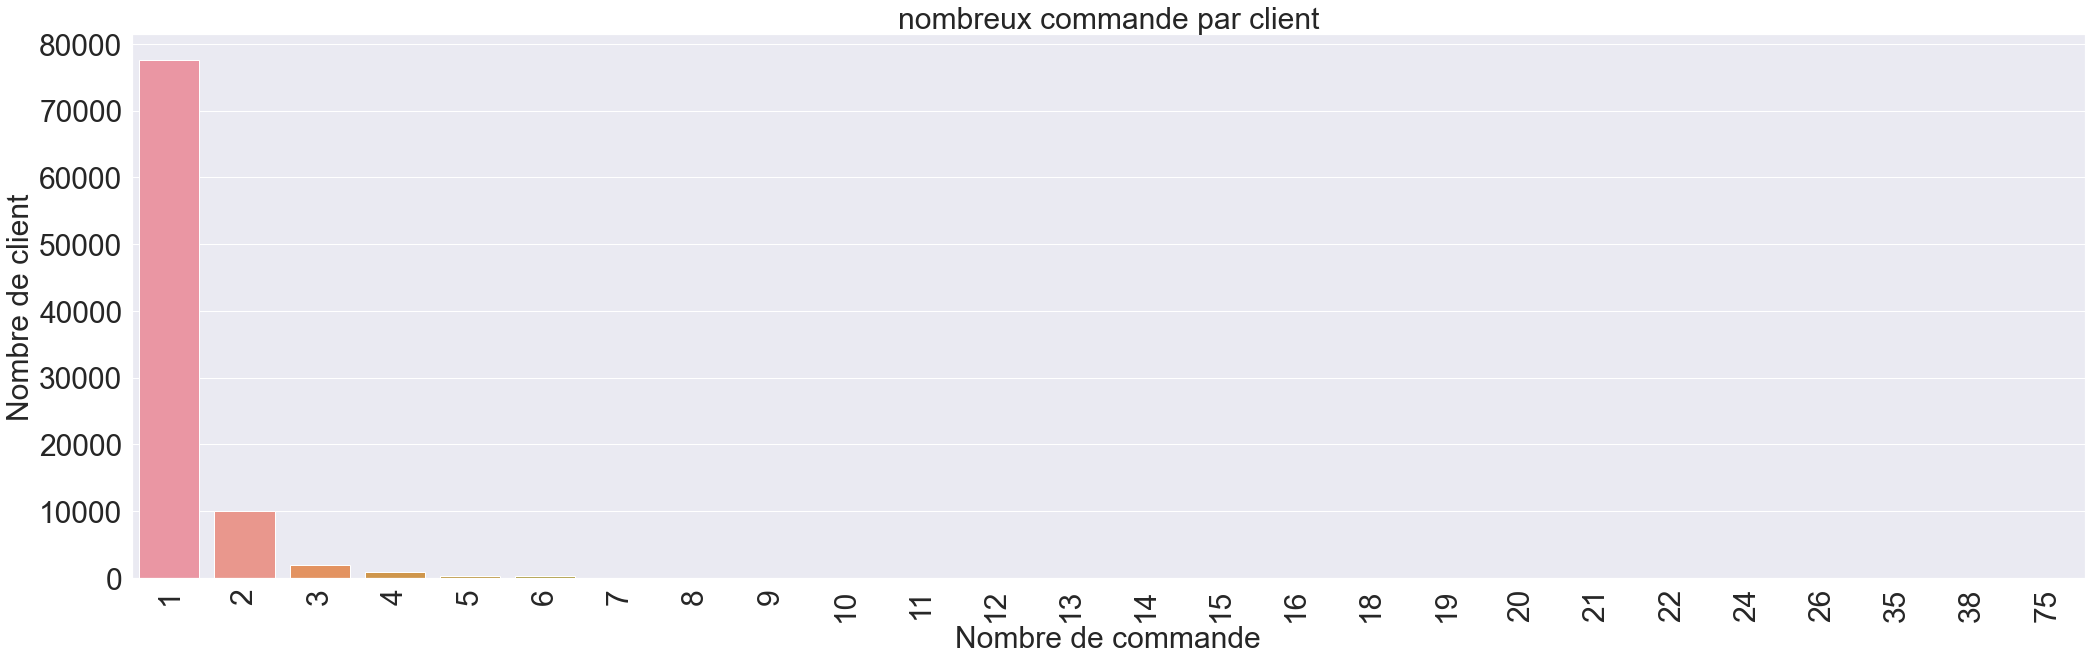

In [79]:
plt.figure(figsize=(35, 10))
plt.title('nombreux commande par client', fontsize = 30)
sn.barplot(x = nb_cde_per_customer['nb_cde_per_customer'].value_counts().index,
            y = nb_cde_per_customer['nb_cde_per_customer'].value_counts().values)
plt.xlabel("Nombre de commande", fontsize = 30)
plt.ylabel("Nombre de client", fontsize = 30)
plt.tick_params(axis = 'x', labelsize = 30)
plt.tick_params(axis = 'y', labelsize = 30)
plt.xticks(rotation=90)
plt.show()

#### création variable 'note moyenne'

In [80]:
average_review_score = df_main[['customer_unique_id','review_score']].groupby(['customer_unique_id']).mean()
average_review_score = average_review_score.rename(columns = {'review_score': 'average_review_score'})
average_review_score = average_review_score.reset_index()


In [81]:
average_review_score.head()

customer_unique_id  average_review_score
0  0000366f3b9a7992bf8c76cfdf3221e2                   5.0
1  0000b849f77a49e4a4ce2b2a4ca5be3f                   4.0
2  0000f46a3911fa3c0805444483337064                   3.0
3  0000f6ccb0745a6a4b88665a16c9f078                   4.0
4  0004aac84e0df4da2b147fca70cf8255                   5.0

#### création variable 'min note commentaire'

In [82]:
min_review_score = df_main[['customer_unique_id','review_score']].groupby(['customer_unique_id']).min()
min_review_score = min_review_score.rename(columns = {'review_score': 'min_review_score'})
min_review_score = min_review_score.reset_index()



In [83]:
min_review_score.head()

customer_unique_id  min_review_score
0  0000366f3b9a7992bf8c76cfdf3221e2               5.0
1  0000b849f77a49e4a4ce2b2a4ca5be3f               4.0
2  0000f46a3911fa3c0805444483337064               3.0
3  0000f6ccb0745a6a4b88665a16c9f078               4.0
4  0004aac84e0df4da2b147fca70cf8255               5.0

#### création variable 'max note commentaire'

In [84]:
max_review_score = df_main[['customer_unique_id','review_score']].groupby(['customer_unique_id']).max()
max_review_score = max_review_score.rename(columns = {'review_score': 'max_review_score'})
max_review_score = max_review_score.reset_index()


In [85]:
max_review_score.head()

customer_unique_id  max_review_score
0  0000366f3b9a7992bf8c76cfdf3221e2               5.0
1  0000b849f77a49e4a4ce2b2a4ca5be3f               4.0
2  0000f46a3911fa3c0805444483337064               3.0
3  0000f6ccb0745a6a4b88665a16c9f078               4.0
4  0004aac84e0df4da2b147fca70cf8255               5.0

#### création variable 'type paiement'

In [86]:
type_payment = df_main[['customer_unique_id','payment_type']].groupby(['customer_unique_id'])['payment_type'].apply(lambda x: x.mode()[0])
type_payment = pd.DataFrame(type_payment)
type_payment = type_payment.reset_index()

#### création variable 'carte bancaire' ou 'autre moyen paiement'

In [87]:

#type_payment['credit card'] =\
    #(type_payment['payment_type'] == 'credit_card')



In [88]:
#type_payment.head()

In [89]:
nb_type_paiement = type_payment.groupby(['payment_type']).count()['customer_unique_id']
nb_type_paiement

payment_type
boleto         18253
credit_card    69862
debit_card      1391
voucher         1706
Name: customer_unique_id, dtype: int64

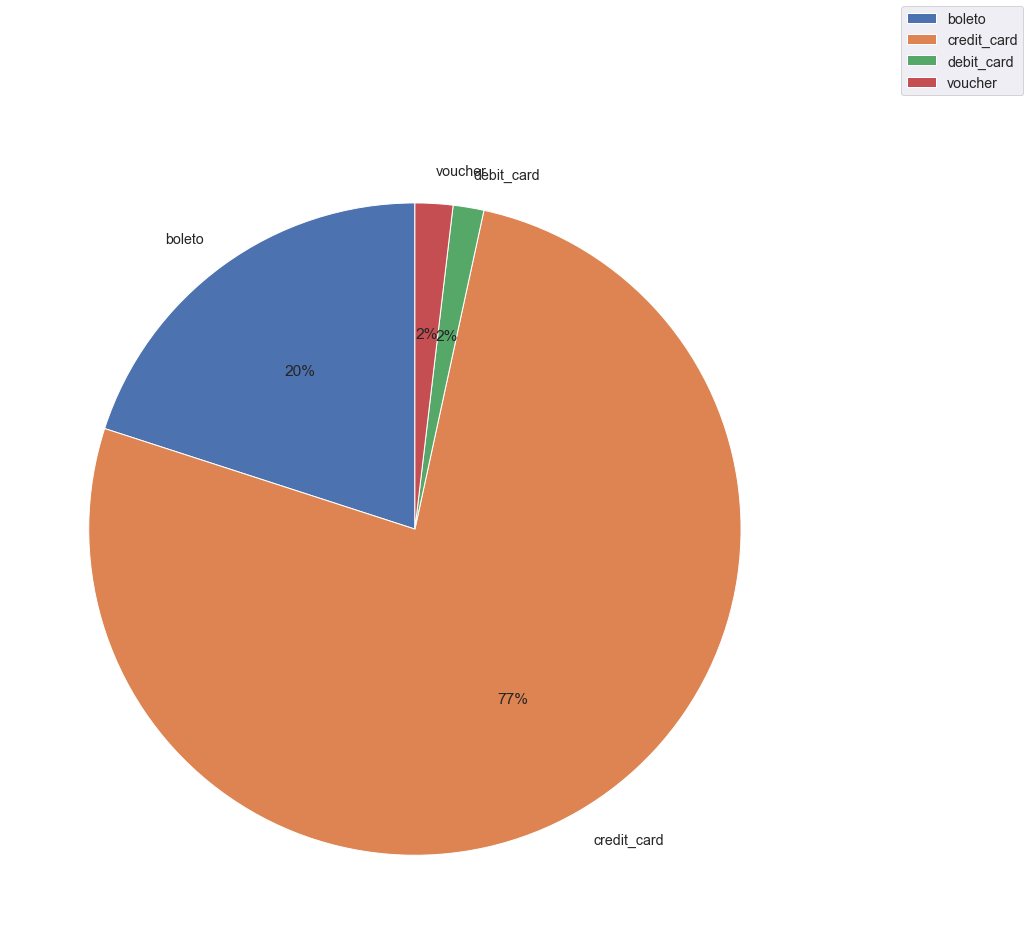

In [90]:
plt.figure(figsize=(15,15))
plt.pie(nb_type_paiement,startangle=90,autopct='%1.0f%%',labels=['boleto','credit_card','debit_card','voucher'])
plt.legend(loc="upper right",bbox_to_anchor=(1.255, 1.15))


#### création variable 'nb fois de paiement'

In [91]:
nb_payment = df_main[['customer_unique_id','payment_installments']].groupby(['customer_unique_id']).mean()
nb_payment = nb_payment.rename(columns = {'payment_installments': 'nb_payment'})
nb_payment = nb_payment.reset_index()


#### création variable 'payment une seul fois' ou 'plusieurs' 

In [92]:

#nb_payment['single_payment'] = (nb_payment['nb_payment'] == 1)


In [93]:
#nb_payment.head()

####  création variable 'achat ville'

In [94]:
city_purchase = df_main[['customer_unique_id','customer_city']].groupby(['customer_unique_id'])['customer_city'].apply(lambda x: x.mode()[0])
city_purchase = pd.DataFrame(city_purchase)
city_purchase = city_purchase.reset_index()


In [95]:
city_purchase.head()

customer_unique_id customer_city
0  0000366f3b9a7992bf8c76cfdf3221e2       cajamar
1  0000b849f77a49e4a4ce2b2a4ca5be3f        osasco
2  0000f46a3911fa3c0805444483337064      sao jose
3  0000f6ccb0745a6a4b88665a16c9f078         belem
4  0004aac84e0df4da2b147fca70cf8255      sorocaba

#### création variable 'achat region'

In [96]:
state_purchase = df_main[['customer_unique_id','customer_state']].groupby(['customer_unique_id'])['customer_state'].apply(lambda x: x.mode()[0])
state_purchase = pd.DataFrame(state_purchase)    
state_purchase = state_purchase.reset_index()

In [97]:
state_purchase.head()

customer_unique_id customer_state
0  0000366f3b9a7992bf8c76cfdf3221e2             SP
1  0000b849f77a49e4a4ce2b2a4ca5be3f             SP
2  0000f46a3911fa3c0805444483337064             SC
3  0000f6ccb0745a6a4b88665a16c9f078             PA
4  0004aac84e0df4da2b147fca70cf8255             SP

In [98]:
state_purchase.nunique()

customer_unique_id    91212
customer_state           27
dtype: int64

<AxesSubplot:xlabel='customer_state'>

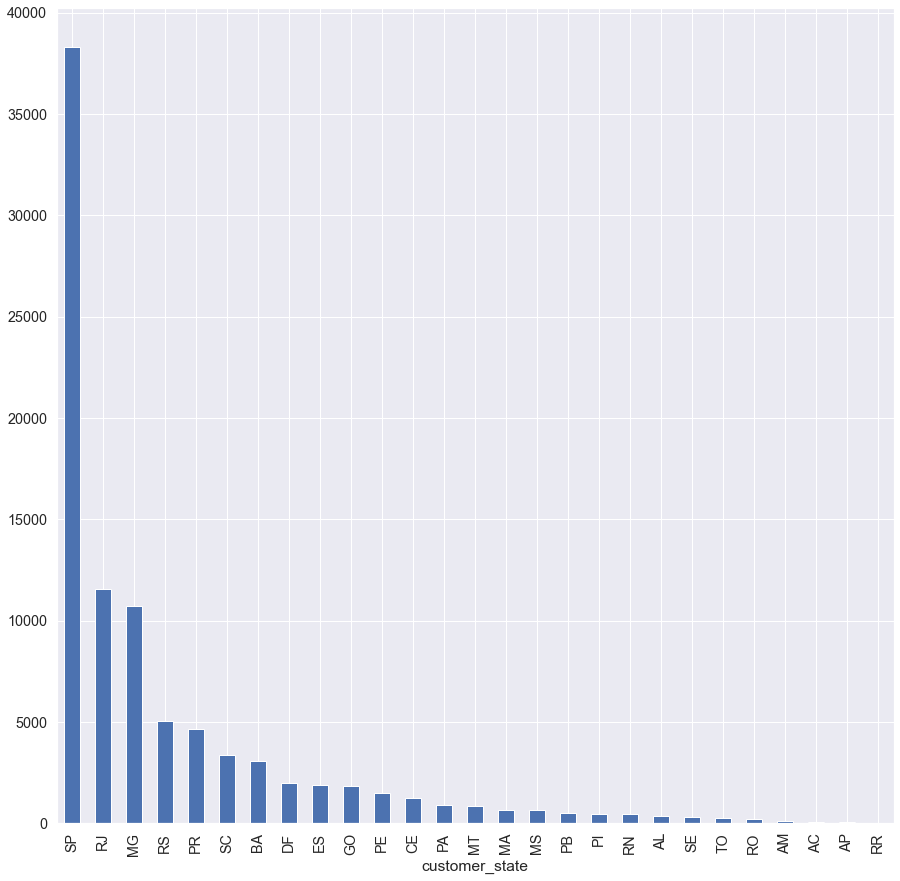

In [99]:
nb_state_purchase = state_purchase.groupby(['customer_state']).count()['customer_unique_id'].sort_values(ascending=False).plot(kind='bar')
nb_state_purchase

#### création variable 'produit le plus acheté'

In [100]:
most_purchased_product = df_main[['customer_unique_id','product_category_name']].groupby(['customer_unique_id'])['product_category_name'].apply(lambda x: x.mode()[0])
most_purchased_product = pd.DataFrame(most_purchased_product)
most_purchased_product = most_purchased_product.reset_index()




In [101]:
# Regroupement de certains types de  produit dans des catégories uniques
product_type = { 
    
                 #Mode
                 'fashion_bags_accessories' : 'Mode',
                 'luggage_accessories' : 'Mode', 
                 'computers_accessories' : 'Mode',
                 'fashion_underwear_beach' : 'Mode',
                 'housewares' : 'Mode',
                 'watches_gifts' : 'Mode',
                 'fashion_shoes' : 'Mode',
                 'fashion_male_clothing' : 'Mode',
                 'fashion_sport' : 'Mode',
                 'fashio_female_clothing':'Mode',
                 'fashion_childrens_clothes':'Mode',
                 'baby':'Mode',
    
                 #Grocery
                 'drinks':'Grocery',
                 'food_drink':'Grocery',
                 'food':'Grocery',
                
                 #Leisure
                 'books_general_interest':'Leisure',
                 'books_technical':'Leisure',
                 'books_imported':'Leisure',
                 'cine_photo':'Leisure',
                 'dvds_blu_ray':'Leisure',
                 'musical_instruments':'Leisure',
                 'cds_dvds_musicals':'Leisure',
                 'audio':'Leisure',
                 'music':'Leisure',
                 'consoles_games':'Leisure',
                 'cool_stuff':'Leisure',
                 'christmas_supplies':'Leisure',
                 'art':'Leisure',
                 'party_supplies':'Leisure',
                 'arts_and_craftmanship':'Leisure',
                 'toys':'Leisure',
                 'sports_leisure':'Leisure',
                 'pet_shop':'Leisure',
    
                 #Technologie, construction 
                 'auto':'Technologie, construction',
                 'telephony':'Technologie, construction',
                 'electronics':'Technologie, construction',
                 'fixed_telephony':'Technologie, construction',
                 'signaling_and_security':'Technologie, construction',
                 'computers':'Technologie, construction',
                 'home_appliances':'Technologie, construction',
                 'small_appliances':'Technologie, construction',
                 'home_appliances_2':'Technologie, construction',
                 'air_conditioning':'Technologie, construction',
                 'small_appliances_home_oven_and_coffee':'Technologie, construction',
                 'home_construction':'Technologie, construction',
                 'garden_tools':'Technologie, construction',
                 'construction_tools_construction':'Technologie, construction',
                 'construction_tools_safety':'Technologie, construction',
                 'construction_tools_lights':'Technologie, construction',
                 'costruction_tools_garden':'Technologie, construction',
                 'costruction_tools_tools':'Technologie, construction',
                 
    
    
                 #Home,Furniture
                 'bed_bath_table':'Home,Furniture',
                 'office_furniture':'Home,Furniture',
                 'furniture_decor':'Home,Furniture',
                 'furniture_living_room':'Home,Furniture',
                 'kitchen_dining_laundry_garden_furniture':'Home,Furniture',
                 'furniture_bedroom':'Home,Furniture',
                 'furniture_mattress_and_upholstery':'Home,Furniture',
                 'la_cuisine':'Home,Furniture',
                 'flowers':'Home,Furniture',
                 'home_confort':'Home,Furniture',
                 'home_comfort_2':'Home,Furniture',
                 'stationery':'Home,Furniture',
                 'tablets_printing_image':'Home,Furniture',
                 
    
                 #Beauty,Health,Personal Care
                 'health_beauty':'Beauty,Health,Personal Care',
                 'perfumery':'Beauty,Health,Personal Care',
                 'diapers_and_hygiene':'Beauty,Health,Personal Care',
                 
    
                 #Other
                 'industry_commerce_and_business':'other',
                 'market_place':'other',
                 'agro_industry_and_commerce':'other',
                 'security_and_services':'other'}

for key, value in product_type.items():
    most_purchased_product['product_category_name'].loc[most_purchased_product["product_category_name"].str.contains(key, case=False, regex=False)] = value
    


In [102]:
most_purchased_product.head()

customer_unique_id        product_category_name
0  0000366f3b9a7992bf8c76cfdf3221e2               Home,Furniture
1  0000b849f77a49e4a4ce2b2a4ca5be3f  Beauty,Health,Personal Care
2  0000f46a3911fa3c0805444483337064               Home,Furniture
3  0000f6ccb0745a6a4b88665a16c9f078    Technologie, construction
4  0004aac84e0df4da2b147fca70cf8255    Technologie, construction

In [103]:
most_purchased_product.nunique()

customer_unique_id       91212
product_category_name        7
dtype: int64

In [104]:
most_purchased_product.product_category_name.unique()

array(['Home,Furniture', 'Beauty,Health,Personal Care',
       'Technologie, construction', 'Leisure', 'Mode', 'Grocery', 'other'],
      dtype=object)

#### dernière date achat

##### création variable 'heure d'achat'

In [105]:
purchase_hour = df_main[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date']].groupby(['customer_unique_id']).head(5)
purchase_hour['order_purchase_timestamp'] = purchase_hour['order_purchase_timestamp'].astype('datetime64')
#purchase_month['purchase_month'] = purchase_month['order_purchase_timestamp'].apply(lambda x: x.month())
purchase_hour['purchase_hour'] = purchase_hour['order_purchase_timestamp'].dt.hour
purchase_hour = purchase_hour.drop(['order_purchase_timestamp','order_delivered_customer_date'],axis=1)


In [106]:
purchase_hour.head()

customer_unique_id  purchase_hour
0  7c396fd4830fd04220f754e42b4e5bff             10
1  7c396fd4830fd04220f754e42b4e5bff             10
2  7c396fd4830fd04220f754e42b4e5bff             10
3  af07308b275d755c9edb36a90c618231             20
4  3a653a41f6f9fc3d2a113cf8398680e8              8

#### création variable 'jour d'achat'

In [107]:
purchase_day = df_main[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date']].groupby(['customer_unique_id']).head(5)
purchase_day['order_purchase_timestamp'] = purchase_day['order_purchase_timestamp'].astype('datetime64')
purchase_day['purchase_day'] = purchase_day['order_purchase_timestamp'].apply(lambda x: x.weekday())
purchase_day = purchase_day.drop(['order_purchase_timestamp','order_delivered_customer_date'],axis=1)

In [108]:
purchase_day.head()

customer_unique_id  purchase_day
0  7c396fd4830fd04220f754e42b4e5bff             0
1  7c396fd4830fd04220f754e42b4e5bff             0
2  7c396fd4830fd04220f754e42b4e5bff             0
3  af07308b275d755c9edb36a90c618231             1
4  3a653a41f6f9fc3d2a113cf8398680e8             2

#### création variable 'mois d'achat'

In [109]:
purchase_month = df_main[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date']].groupby(['customer_unique_id']).head(5)
purchase_month['order_purchase_timestamp'] = purchase_month['order_purchase_timestamp'].astype('datetime64')
#purchase_month['purchase_month'] = purchase_month['order_purchase_timestamp'].apply(lambda x: x.month())
purchase_month['purchase_month'] = purchase_month['order_purchase_timestamp'].dt.month
purchase_month = purchase_month.drop(['order_purchase_timestamp','order_delivered_customer_date'],axis=1)

In [110]:
purchase_month.head()

customer_unique_id  purchase_month
0  7c396fd4830fd04220f754e42b4e5bff              10
1  7c396fd4830fd04220f754e42b4e5bff              10
2  7c396fd4830fd04220f754e42b4e5bff              10
3  af07308b275d755c9edb36a90c618231               7
4  3a653a41f6f9fc3d2a113cf8398680e8               8

#### création variable 'délai livraison'

In [111]:
deadline_order = df_main[['customer_unique_id','order_purchase_timestamp','order_delivered_customer_date']].groupby(['customer_unique_id']).head(5)
deadline_order['order_purchase_timestamp'] = deadline_order['order_purchase_timestamp'].astype('datetime64')
deadline_order['order_delivered_customer_date'] = pd.to_datetime(deadline_order['order_delivered_customer_date'],errors='coerce')
deadline_order['deadline_order'] = deadline_order['order_delivered_customer_date']- deadline_order['order_purchase_timestamp']
deadline_order = deadline_order.drop(['order_purchase_timestamp','order_delivered_customer_date'],axis=1)


In [112]:
deadline_order.head()

customer_unique_id   deadline_order
0  7c396fd4830fd04220f754e42b4e5bff  8 days 10:28:40
1  7c396fd4830fd04220f754e42b4e5bff  8 days 10:28:40
2  7c396fd4830fd04220f754e42b4e5bff  8 days 10:28:40
3  af07308b275d755c9edb36a90c618231 13 days 18:46:08
4  3a653a41f6f9fc3d2a113cf8398680e8  9 days 09:27:40

#### création variable 'taille du commentaire'

In [115]:
# taille du commentaire

for label, row in df_main.iterrows():
    df_main.loc[label, 'longeur_du_commentaire'] =len(row['review_comment_message'])
taille_commentaire = df_main[['customer_unique_id','longeur_du_commentaire']].groupby(['customer_unique_id']).mean()
taille_commentaire = taille_commentaire.reset_index()

In [116]:
taille_commentaire.head()

customer_unique_id  longeur_du_commentaire
0  0000366f3b9a7992bf8c76cfdf3221e2                   111.0
1  0000b849f77a49e4a4ce2b2a4ca5be3f                     8.0
2  0000f46a3911fa3c0805444483337064                     8.0
3  0000f6ccb0745a6a4b88665a16c9f078                    12.0
4  0004aac84e0df4da2b147fca70cf8255                     8.0

In [117]:
end_date = max(df_main['order_purchase_timestamp']) + dt.timedelta(days=1)

df_rfm = df_main.groupby('customer_unique_id').agg(
    #la durée entre une date de référence et la dernière date d'achat de chaque client
    recency=('order_purchase_timestamp', lambda x: (end_date - x.max()).days),
    #le nombre de fois où votre client a fait une transaction pendant une période donnée donc 
    #le nombre de commande sur la période de l'étude
    #frequency=('customer_unique_id', 'count'),
    frequency=('order_id', 'count'),
    #la somme des dépenses de votre client
    monetary=('payment_value', 'sum')
).reset_index()

df_rfm.head()

customer_unique_id  recency  frequency  monetary
0  0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90
1  0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     27.19
2  0000f46a3911fa3c0805444483337064      537          1     86.22
3  0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62
4  0004aac84e0df4da2b147fca70cf8255      288          1    196.89

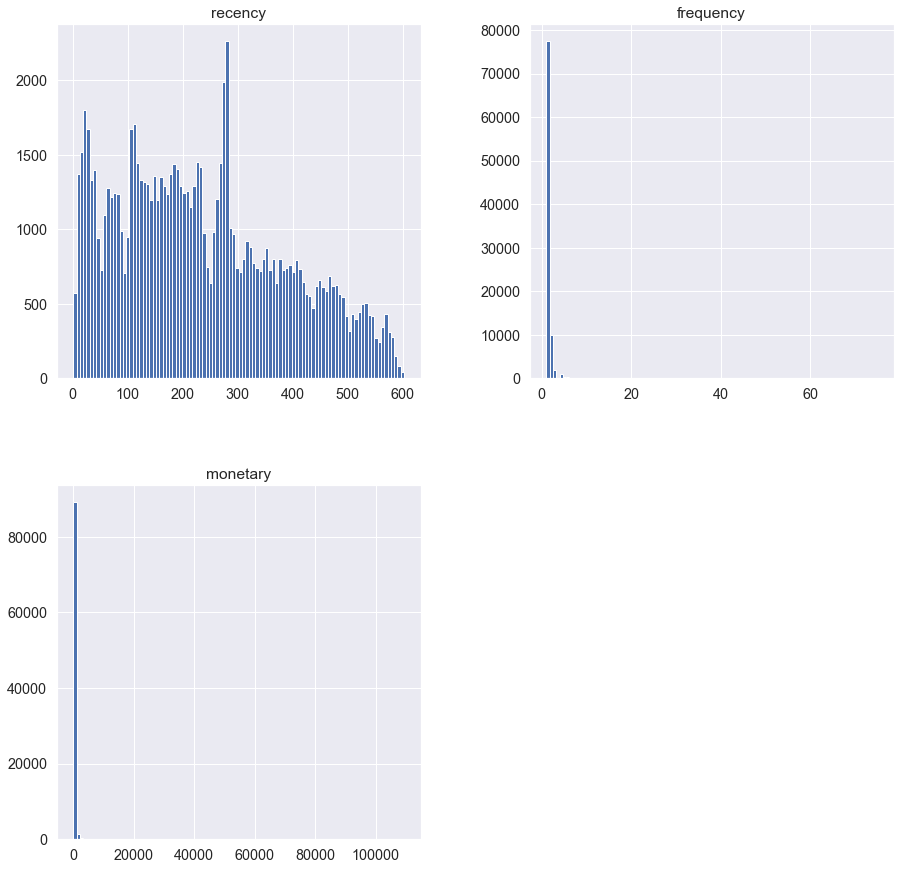

In [118]:
hist = df_rfm.hist(bins=100)

In [119]:
last_purchase = df_main['order_purchase_timestamp'].groupby(df_main['customer_unique_id']).transform('max')

In [120]:
last_purchase

0        2017-10-02 10:56:33
1        2017-10-02 10:56:33
2        2017-10-02 10:56:33
3        2018-07-24 20:41:37
4        2018-08-08 08:38:49
5        2017-11-18 19:28:06
6        2018-02-13 21:18:39
7        2017-07-09 21:57:05
9        2017-05-16 13:10:30
10       2017-01-23 18:29:09
11       2017-07-29 11:55:02
12       2017-07-29 11:55:02
13       2017-05-16 19:41:10
14       2017-05-16 19:41:10
15       2017-07-13 19:58:11
16       2018-06-07 10:06:19
17       2018-07-25 17:44:10
18       2018-03-01 14:14:28
19       2018-06-07 19:03:12
21       2017-12-26 23:41:31
22       2017-11-21 00:03:41
23       2017-10-26 15:54:26
24       2017-10-26 15:54:26
25       2017-10-26 15:54:26
26       2017-09-18 14:31:30
27       2018-03-15 08:52:40
28       2018-02-03 20:37:35
29       2018-01-08 07:55:29
30       2018-08-09 11:44:40
31       2018-02-20 23:46:53
32       2018-06-04 00:00:13
33       2018-06-04 00:00:13
34       2018-03-12 01:50:26
35       2018-05-02 11:45:38
36       2018-

In [ ]:
#last_purchase = df_main[['customer_unique_id','last_purchase']].groupby(['customer_unique_id'])
#last_purchase = last_purchase.rename(columns = {'last_purchase': 'max'})
#last_purchase = last_purchase.reset_index()
#last_purchase.head()

In [ ]:
#last_purchase.head()

In [121]:
df_main_bis = pd.DataFrame()

In [114]:
#print(type(last_purchase))

In [ ]:
end_date

In [ ]:
#df_temp = pd.DataFrame(last_purchase)
#df_temp.head()

In [122]:

df_main_bis = (
    
                    # The main df is base one the rfm dataframe
                    df_rfm
                    # merge average_purchase dataframe
                    .merge(average_purchase, how = 'left', on = 'customer_unique_id')
    
                    #Merge min_purchase dataframe
                    .merge(min_purchase, how = 'left', on = 'customer_unique_id')
    
                    #Merge max_purchase dataframe
                    .merge(max_purchase, how = 'left', on = 'customer_unique_id')
    
                    
                    #Merge nb_item_per_customer dataframe
                    .merge(nb_item_per_customer, how = 'left', on = 'customer_unique_id')
    
                    #Merge nb_cde_per_customer dataframe
                    .merge(nb_cde_per_customer, how = 'left', on = 'customer_unique_id')
    
                    #Merge average_review_score dataframe
                    .merge(average_review_score, how = 'left', on = 'customer_unique_id')
    
                    #Merge minimum_review_score dataframe
                    .merge(min_review_score, how = 'left', on = 'customer_unique_id')
                    
                    
                    #Merge maximum_review_score dataframe
                    .merge(max_review_score, how = 'left', on = 'customer_unique_id')
    
    
                    #Merge type_payment dataframe
                    .merge(type_payment, how = 'left', on = 'customer_unique_id')
                    
                    #Merge nb_payment dataframe
                    .merge(nb_payment, how = 'left', on = 'customer_unique_id')
    
    
                    #Merge ville achat dataframe
                    .merge(city_purchase, how = 'left', on = 'customer_unique_id')
    
                    #Merge région achat dataframe
                    .merge(state_purchase, how = 'left', on = 'customer_unique_id')
    
                    #Merge délais livraison dataframe
                    .merge(deadline_order, how = 'left', on = 'customer_unique_id')
    
                    #Merge jour achat dataframe
                    .merge(purchase_day, how = 'left', on = 'customer_unique_id')
    
                    #Merge mois achat dataframe
                    .merge(purchase_month, how = 'left', on = 'customer_unique_id')
    
                    #Merge heure achat dataframe
                    .merge(purchase_hour, how = 'left', on = 'customer_unique_id')
                
                    #Merge most_purchased_product dataframe
                    .merge(most_purchased_product, how = 'left', on = 'customer_unique_id')
    
    
                    #Merge most_purchased_product dataframe
                    .merge(taille_commentaire, how = 'left', on = 'customer_unique_id')





)



In [123]:
df_main_bis = df_main_bis.drop_duplicates(['customer_unique_id'])

In [124]:
df_main_bis['last_purchase'] = last_purchase

In [125]:
df_main_bis.head(20)

customer_unique_id  recency  frequency  monetary  \
0   0000366f3b9a7992bf8c76cfdf3221e2      112          1    141.90   
1   0000b849f77a49e4a4ce2b2a4ca5be3f      115          1     27.19   
2   0000f46a3911fa3c0805444483337064      537          1     86.22   
3   0000f6ccb0745a6a4b88665a16c9f078      321          1     43.62   
4   0004aac84e0df4da2b147fca70cf8255      288          1    196.89   
5   0004bd2a26a76fe21f786e4fbd80607f      146          1    166.98   
6   00050ab1314c0e55a6ca13cf7181fecf      132          1     35.38   
7   00053a61a98854899e70ed204dd4bafe      183          2    838.36   
23  0005e1862207bf6ccc02e4228effd9a0      543          1    150.12   
24  0005ef4cd20d2893f0d9fbd94d3c0d97      170          1    129.76   
25  0006fdc98a402fceb4eb0ee528f6a8d4      408          1     29.00   
26  00082cbe03e478190aadbea78542e933      283          1    126.26   
27  00090324bbad0e9342388303bb71ba0a      159          1     63.66   
28  000949456b182f53c18b68d6babc79c1      129          1     82.05   
29  000a5ad9c4601d2bbdd9ed765d5213b3      384          1     91.28   
30  000bfa1d2f1a41876493be685390d6d3      335          2     93.70   
46  000c8bdb58a29e7115cfc257230fb21b      260          1     29.00   
47  000d460961d6dbfa3ec6c9f5805769e1      234          1     36.68   
48  000de6019bb59f34c099a907c151d855      377          2    514.88   
64  000e309254ab1fc5ba99dd469d36bdb4       66          2     78.42   

    average_purchase  min_purchase  max_purchase  nb_item_per_customer  \
0             129.90        129.90        129.90                     1   
1              18.90         18.90         18.90                     1   
2              69.00         69.00         69.00                     1   
3              25.99         25.99         25.99                     1   
4             180.00        180.00        180.00                     1   
5             154.00        154.00        154.00                     1   
6              27.99         27.99         27.99                     1   
7             191.00        191.00        191.00                     2   
23            135.00        135.00        135.00                     1   
24            104.90        104.90        104.90                     1   
25             13.90         13.90         13.90                     1   
26             79.00         79.00         79.00                     1   
27             49.95         49.95         49.95                     1   
28             64.89         64.89         64.89                     1   
29             76.99         76.99         76.99                     1   
30             35.00         35.00         35.00                     2   
46             13.90         13.90         13.90                     1   
47             28.90         28.90         28.90                     1   
48            114.90         89.90        139.90                     2   
64             59.90         59.90         59.90                     2   

    nb_cde_per_customer  average_review_score  min_review_score  \
0                     1                   5.0               5.0   
1                     1                   4.0               4.0   
2                     1                   3.0               3.0   
3                     1                   4.0               4.0   
4                     1                   5.0               5.0   
5                     1                   4.0               4.0   
6                     1                   4.0               4.0   
7                     2                   1.0               1.0   
23                    1                   4.0               4.0   
24                    1                   1.0               1.0   
25                    1                   3.0               3.0   
26                    1                   5.0               5.0   
27                    1                   5.0               5.0   
28                    1                   4.0         

In [ ]:
#df_main_bis.frequency.sort_values(ascending = False)

In [ ]:
#df_main_bis.nb_item_per_customer.sort_values(ascending = False)

In [ ]:
#df_main_bis.nb_cde_per_customer.sort_values(ascending = False)

In [126]:
df_main_bis.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 91212 entries, 0 to 1158030
Data columns (total 23 columns):
 #   Column                  Non-Null Count  Dtype          
---  ------                  --------------  -----          
 0   customer_unique_id      91212 non-null  object         
 1   recency                 91212 non-null  int64          
 2   frequency               91212 non-null  int64          
 3   monetary                91212 non-null  float64        
 4   average_purchase        91212 non-null  float64        
 5   min_purchase            91212 non-null  float64        
 6   max_purchase            91212 non-null  float64        
 7   nb_item_per_customer    91212 non-null  int64          
 8   nb_cde_per_customer     91212 non-null  int64          
 9   average_review_score    91212 non-null  float64        
 10  min_review_score        91212 non-null  float64        
 11  max_review_score        91212 non-null  float64        
 12  payment_type            91212 

In [ ]:
#maximum 8 catégorie , donc faut re voir les regroupement 

In [127]:
df_main_bis.shape

(91212, 23)

In [128]:
df_main_bis.isna().sum()

customer_unique_id            0
recency                       0
frequency                     0
monetary                      0
average_purchase              0
min_purchase                  0
max_purchase                  0
nb_item_per_customer          0
nb_cde_per_customer           0
average_review_score          0
min_review_score              0
max_review_score              0
payment_type                  0
nb_payment                    0
customer_city                 0
customer_state                0
deadline_order                0
purchase_day                  0
purchase_month                0
purchase_hour                 0
product_category_name         0
longeur_du_commentaire        0
last_purchase             81954
dtype: int64

In [129]:
df_main_bis.describe().T

count                        mean  \
recency                 91212.0                  235.832434   
frequency               91212.0                    1.237315   
monetary                91212.0                  212.225838   
average_purchase        91212.0                  125.629783   
min_purchase            91212.0                   123.96496   
max_purchase            91212.0                  127.496706   
nb_item_per_customer    91212.0                    1.237315   
nb_cde_per_customer     91212.0                    1.237315   
average_review_score    91212.0                    4.155195   
min_review_score        91212.0                    4.144192   
max_review_score        91212.0                     4.16648   
nb_payment              91212.0                    2.901351   
deadline_order            91212  12 days 12:03:54.469971056   
purchase_day            91212.0                    2.756063   
purchase_month          91212.0                    6.027299   
purchase_hour           91212.0                    14.78664   
longeur_du_commentaire  91212.0                   32.074289   

                                              std              min  \
recency                                150.895126              1.0   
frequency                                0.844144              1.0   
monetary                               631.847668             9.59   
average_purchase                       188.683344             0.85   
min_purchase                           188.191828             0.85   
max_purchase                           190.802827             0.85   
nb_item_per_customer                     0.844144              1.0   
nb_cde_per_customer                      0.844144              1.0   
average_review_score                     1.278739              1.0   
min_review_score                            1.291              1.0   
max_review_score                         1.276814              1.0   
nb_payment                               2.678485              0.0   
deadline_order          9 days 11:15:29.773890566  0 days 12:48:07   
purchase_day                             1.967108              0.0   
purchase_month                            3.21571              1.0   
purchase_hour                            5.317535              0.0   
longeur_du_commentaire                  44.487346              1.0   

                                           25%               50%  \
recency                                  113.0             217.0   
frequency                                  1.0               1.0   
monetary                                 63.83            112.83   
average_purchase                          42.9              79.0   
min_purchase                             39.99             77.94   
max_purchase                             43.59              79.9   
nb_item_per_customer                       1.0               1.0   
nb_cde_per_customer                        1.0               1.0   
average_review_score                       4.0               5.0   
min_review_score                           4.0               5.0   
max_review_score                           4.0               5.0   
nb_payment                                 1.0               2.0   
deadline_order          6 days 17:55:00.250000  10 days 04:37:11   
purchase_day                               1.0               3.0   
purchase_month                             3.0               6.0   
purchase_hour                             11.0              15.0   
longeur_du_commentaire                     8.0               8.0   

                                     75%                max  
recency                            344.0              602.0  
frequency                            1.0               75.0  
monetary                        202.6525          109312.64  
average_purchase                   139.9             6735.0  
min_purchase                       139.0             6735.0  
max_purchase                     

In [130]:
# Export des données nettoyées sans pré-processing
df_main_bis.to_csv('OLIST_data_exploratoire_bis.csv',index = False)